In [ ]:
%tensorflow_version 2.x
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

import os
import PIL
import PIL.Image

In [ ]:
import pathlib
dataset_url = "dataset_augmented"
#data_dir = tf.keras.utils.get_file(origin=dataset_url,fname='dataset_augmented', untar=False)
data_dir = pathlib.Path(dataset_url)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


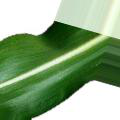

In [ ]:
leaf = list(data_dir.glob('normal/*'))
PIL.Image.open(str(leaf[0]))

In [ ]:
batch_size = 17
img_height = 120
img_width = 120

In [ ]:
class_names = ['interveinal', 'margin', 'normal', 'spotty', 'tip']

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'dataset_split/train',
  seed=42,
  #shuffle=True,
  label_mode='categorical',
  class_names = class_names,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'dataset_split/val',
  seed=42,
  #shuffle=True,
  label_mode='categorical',
  class_names = class_names,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'dataset_split/test',
  seed=42,
  #shuffle=True,
  label_mode='categorical',
  class_names = class_names,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1530 files belonging to 5 classes.
Found 305 files belonging to 5 classes.
Found 205 files belonging to 5 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'dataset',
  seed=42,
  #shuffle=True,
  class_names = ['interveinal', 'margin', 'normal', 'spotty', 'tip'],
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 85 files belonging to 5 classes.


In [ ]:
test_ds

<BatchDataset shapes: ((None, 120, 120, 3), (None, 5)), types: (tf.float32, tf.float32)>

In [ ]:
class_names = test_ds.class_names
print(class_names)

['interveinal', 'margin', 'normal', 'spotty', 'tip']


In [ ]:
for ima, lab in test_ds.take(1):
  print(lab)

tf.Tensor(
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(17, 5), dtype=float32)


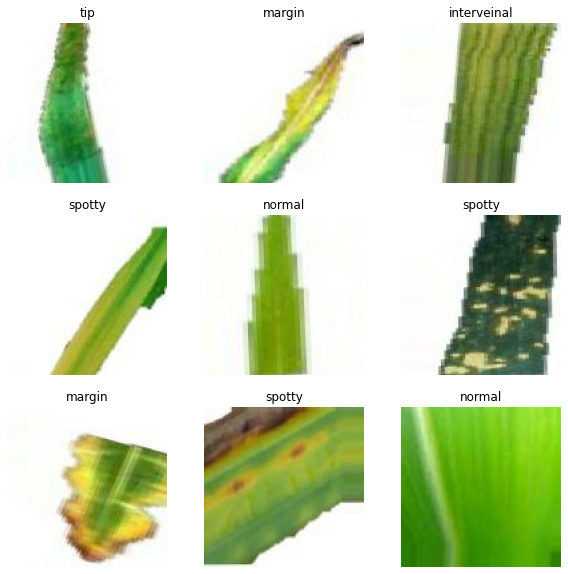

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds:#.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
    print(labels_batch.shape)
    print(image_batch.shape)

(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(17, 5)
(17, 120, 120, 3)
(1, 5)
(1, 120, 120, 3)


In [ ]:
test_images = []
test_labels = []
count = 0
for image_batch, labels_batch in test_ds:
  count += 1
  print(labels_batch.shape)
  print(count)
  if(count<=12):
    for i in range(17):
      test_images.append(image_batch[i])
    #test_labels.append(labels_batch[i])
      test_labels.append(class_names[np.argmax(labels_batch[i])])
    #test_labels.append(labels_batch[i])
  else:
    test_images.append(image_batch[0])
    test_labels.append(class_names[np.argmax(labels_batch[0])])
  

(17, 5)
1
(17, 5)
2
(17, 5)
3
(17, 5)
4
(17, 5)
5
(17, 5)
6
(17, 5)
7
(17, 5)
8
(17, 5)
9
(17, 5)
10
(17, 5)
11
(17, 5)
12
(1, 5)
13


In [ ]:
len(test_labels)

205

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers

num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(),#'adam',
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=200 #200
)

Epoch 1/200
90/90 [==============================] - 1s 10ms/step - loss: 1.6350 - accuracy: 0.2090 - val_loss: 1.6058 - val_accuracy: 0.2164
Epoch 2/200
90/90 [==============================] - 1s 9ms/step - loss: 1.6019 - accuracy: 0.2385 - val_loss: 1.5967 - val_accuracy: 0.2623
Epoch 3/200
90/90 [==============================] - 1s 9ms/step - loss: 1.5794 - accuracy: 0.2609 - val_loss: 1.5712 - val_accuracy: 0.3475
Epoch 4/200
90/90 [==============================] - 1s 9ms/step - loss: 1.5384 - accuracy: 0.2621 - val_loss: 1.5030 - val_accuracy: 0.4066
Epoch 5/200
90/90 [==============================] - 1s 10ms/step - loss: 1.4672 - accuracy: 0.3251 - val_loss: 1.4409 - val_accuracy: 0.4230
Epoch 6/200
90/90 [==============================] - 1s 9ms/step - loss: 1.4117 - accuracy: 0.3499 - val_loss: 1.4145 - val_accuracy: 0.4590
Epoch 7/200
90/90 [==============================] - 1s 9ms/step - loss: 1.3853 - accuracy: 0.3850 - val_loss: 1.3666 - val_accuracy: 0.4885
Epoch 8/200

In [ ]:
len(history.history['accuracy'])

200

In [ ]:
model.save('models/200_epoch_97_87_soft.h5')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
pred=model.evaluate(test_ds,verbose=1) #RESCALE TEST

13/13 [==============================] - 0s 11ms/step - loss: 0.3433 - accuracy: 0.8780


In [ ]:
class_names

['interveinal', 'margin', 'normal', 'spotty', 'tip']

In [ ]:
test_data_batch = test_ds.take(1)
pred=model.predict(test_data_batch,verbose=1)
#predictions = [class_names[i] for i in pred_id]

1/1 [==============================] - 0s 257ms/step


In [ ]:
pred

array([[2.9077489e-04, 9.9447846e-01, 1.6767210e-03, 1.9292370e-06,
        3.5519719e-03],
       [6.5372540e-03, 2.3728810e-01, 2.2325340e-04, 4.5345375e-01,
        3.0249760e-01],
       [1.7043209e-05, 8.0127627e-01, 1.5695649e-06, 3.4103994e-07,
        1.9870482e-01],
       ...,
       [9.4831405e-05, 7.7052701e-01, 1.8690254e-06, 5.6957100e-02,
        1.7241922e-01],
       [3.4811273e-03, 5.6928277e-01, 2.0236068e-03, 1.0569954e-01,
        3.1951293e-01],
       [1.1625288e-02, 4.4786894e-08, 8.7609030e-03, 9.7905296e-01,
        5.6082208e-04]], dtype=float32)

In [ ]:
pred_id = np.argmax(pred, axis=1)
pred_id


array([4, 3, 0, 4, 0, 1, 4, 2, 0, 1, 2, 2, 1, 3, 0, 0, 0])

1/1 [==============================] - 0s 15ms/step
[0 1 3 4 1 3 0 3 4 1 3 4 2 4 0 0 3] [0 1 3 4 4 3 0 3 4 1 3 4 4 4 0 0 3]


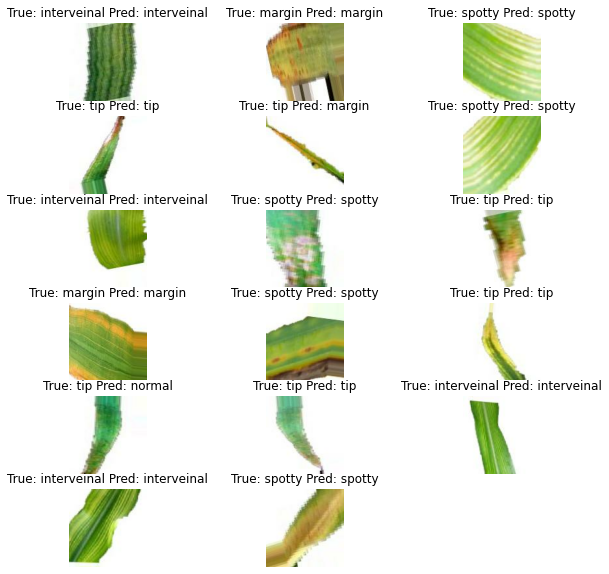

In [ ]:
#pred_id = np.argmax(pred,axis=1)
#predictions = [class_names[i] for i in pred_id]
#predictions






import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  pred=model_200.predict(images,verbose=1)
  pred_id = np.argmax(pred,axis=1)

  #print(labels,pred)
  print(pred_id,np.argmax(labels,axis=1))
  for i in range(17):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title('True: '+class_names[np.argmax(labels[i])]+' Pred: '+class_names[np.argmax(pred[i])])
    plt.axis("off")

In [ ]:
class_names

['interveinal', 'margin', 'normal', 'spotty', 'tip']

In [ ]:
np.argmax(labels,axis=1), pred_id

(array([4, 2, 3, 1, 2, 3, 3, 1, 4, 1, 3, 3, 0, 4, 0, 1, 3]),
 array([4, 2, 0, 4, 2, 3, 3, 1, 3, 1, 3, 3, 0, 4, 0, 1, 3]))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = [class_names[i] for i in np.argmax(labels,axis=1) ]
y_pred = [class_names[i] for i in pred_id ]
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred, labels=class_names))
print('Classification Report')
target_names = class_names
print(classification_report(y_true, y_pred, target_names=target_names))

Confusion Matrix
[[4 0 0 0 0]
 [0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 5 0]
 [0 1 1 0 4]]
Classification Report
              precision    recall  f1-score   support

 interveinal       1.00      1.00      1.00         4
      margin       0.67      1.00      0.80         2
      normal       0.00      0.00      0.00         0
      spotty       1.00      1.00      1.00         5
         tip       1.00      0.67      0.80         6

    accuracy                           0.88        17
   macro avg       0.73      0.73      0.72        17
weighted avg       0.96      0.88      0.91        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_images_b = [tf.expand_dims(i, 0) for i in test_images]
test_images_b[0]

<tf.Tensor: shape=(1, 120, 120, 3), dtype=float32, numpy=
array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 251., 255.],
         [255., 251., 255.],
         [255., 251., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 250., 254.],
         [255., 250., 254.],
         [255., 250., 254.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [252., 250., 253.],
         [252., 250., 253.],
         [252., 250., 253.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         

In [ ]:
preds = []
for img in test_images_b:
  pred=model_200.predict(img,verbose=1)
  preds.append(pred)
#pred_id = np.argmax(pred,axis=1)
#print(len(pred_id))

In [ ]:
#IMAGES VS PRED VS ACTUAL
#TRY FOR USER INPUT IMAGE -> RESHAPE -> RESCALE? -> PREDICT -> DISPLAY

In [ ]:
preds[0][0]

array([-2.8286436,  2.1728165, -2.5555708,  1.3706894,  1.8310554],
      dtype=float32)

In [ ]:
#preds[0]
pred_id =[np.argmax(p[0]) for p in preds]
pred_id

In [ ]:
predictions = [class_names[i] for i in pred_id]

In [ ]:
h = model.evaluate(test_data_batch,verbose=1)


1/1 [==============================] - 0s 209ms/step - loss: 0.6602 - accuracy: 0.7647


In [ ]:
h

[0.5349730849266052, 0.795121967792511]

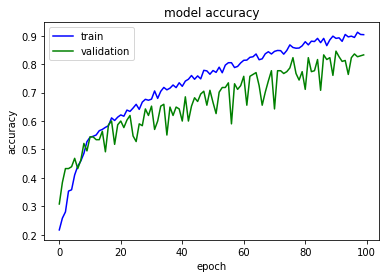

In [ ]:
plt.plot(history_.history['accuracy'], 'b')
plt.plot(history_.history['val_accuracy'], 'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


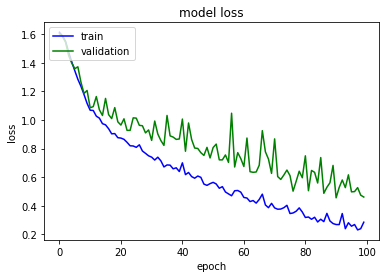

In [ ]:
# summarize history for loss
plt.plot(history_.history['loss'], 'b')
plt.plot(history_.history['val_loss'], 'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

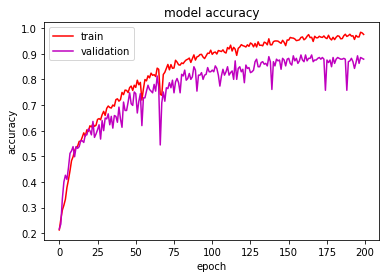

In [ ]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'm')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


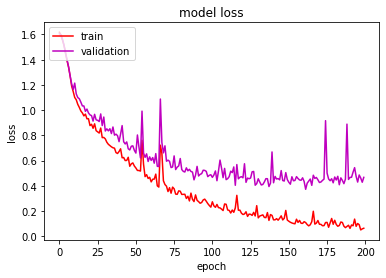

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Visualizing predictions

from tensorflow import keras

model_200 = keras.models.load_model('models/200_epoch_96_87.h5')

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_100, to_file='models/model_100.png')

In [ ]:
image = tf.keras.preprocessing.image.load_img('dataset/interveinal_/interveinal/rice2.jpg')
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = tf.keras.preprocessing.image.smart_resize(input_arr,(120,120))

input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model_200.predict(input_arr)

In [ ]:
predictions, class_names

(array([[ 9.7408495, -0.1039817, -1.3821762,  2.2115111, -6.905595 ]],
       dtype=float32), ['interveinal', 'margin', 'normal', 'spotty', 'tip'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_labels
y_pred = predictions
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred, labels=class_names))
print('Classification Report')
target_names = class_names
print(classification_report(y_true, y_pred, target_names=target_names))

Confusion Matrix
[[41  0  0  0  0]
 [ 0 33  0  4  4]
 [ 0  0 41  0  0]
 [ 2  0  0 38  1]
 [ 0  6  3  0 32]]
Classification Report
              precision    recall  f1-score   support

 interveinal       0.95      1.00      0.98        41
      margin       0.85      0.80      0.83        41
      normal       0.93      1.00      0.96        41
      spotty       0.90      0.93      0.92        41
         tip       0.86      0.78      0.82        41

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [ ]:
h = model_200.evaluate(test_ds) #unaugmented 85 images

5/5 [==============================] - 28s 8ms/step - loss: 0.3963 - accuracy: 0.8824
